1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

max_speeds


array([28.09, 22.46, 26.65, 26.65, 28.79, 30.19, 26.19, 26.75, 23.34,
       24.16, 29.75, 27.93, 26.68, 23.85, 32.97, 25.79, 26.37, 25.28,
       26.73, 23.2 , 26.76], dtype=float32)

The estimated max speed value over 50 years is: 36.9
[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]


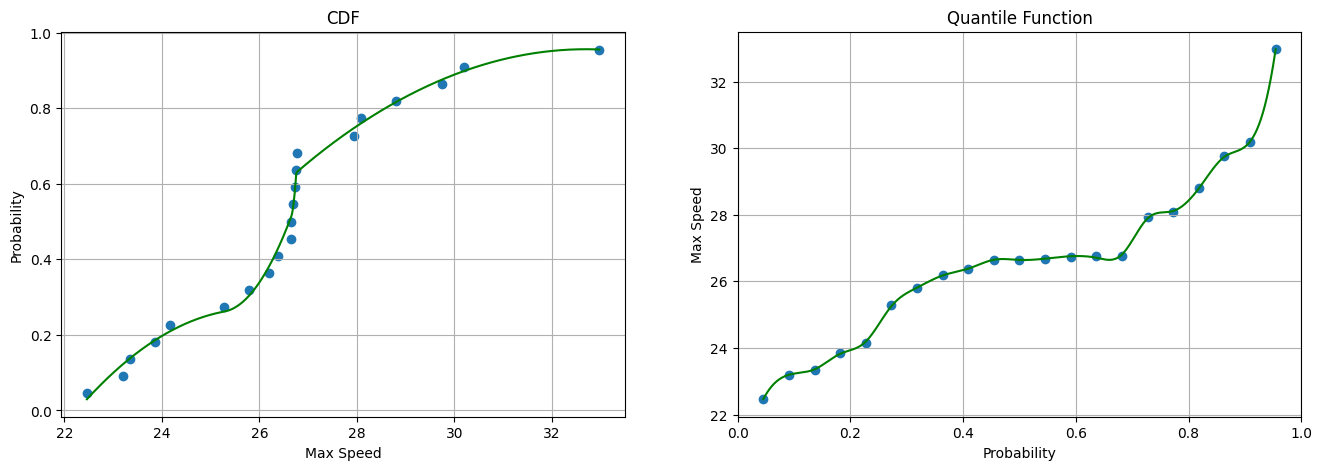

In [3]:
cprob = np.array([i/(1+years_nb) for i in range(1, years_nb+1)])
cprob

max_speeds.sort()

def cdf(x):
    cdf = sp.interpolate.UnivariateSpline(max_speeds, cprob, k=2)
    cdf.set_smoothing_factor(0.01)
    return cdf(x)

def quantile_func(x):
    qf = sp.interpolate.UnivariateSpline(cprob, max_speeds, k=3)
    qf.set_smoothing_factor(0.01)
    return qf(x)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))

x1 = np.linspace(max_speeds.min(), max_speeds.max(), 1000)
x2 = np.linspace(cprob.min(), cprob.max(), 1000)

ax[0].scatter(max_speeds, cprob)
ax[1].scatter(cprob, max_speeds)
ax[0].plot(x1, cdf(x1), 'g')
ax[1].plot(x2, quantile_func(x2), 'g')

ax[0].set_title('CDF')
ax[0].set_xlabel('Max Speed')
ax[0].set_ylabel('Probability')

ax[1].set_title('Quantile Function')
ax[1].set_xlabel('Probability')
ax[1].set_ylabel('Max Speed')

ax[0].grid()
ax[1].grid()

fifty_prob = 1. - 0.02

fifty_wind = quantile_func(fifty_prob)

print('The estimated max speed value over 50 years is: %.1f' %fifty_wind)

print(cprob)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

7.16349760032963 0.04533036040118059
6.741230557647394 0.08195313955816931


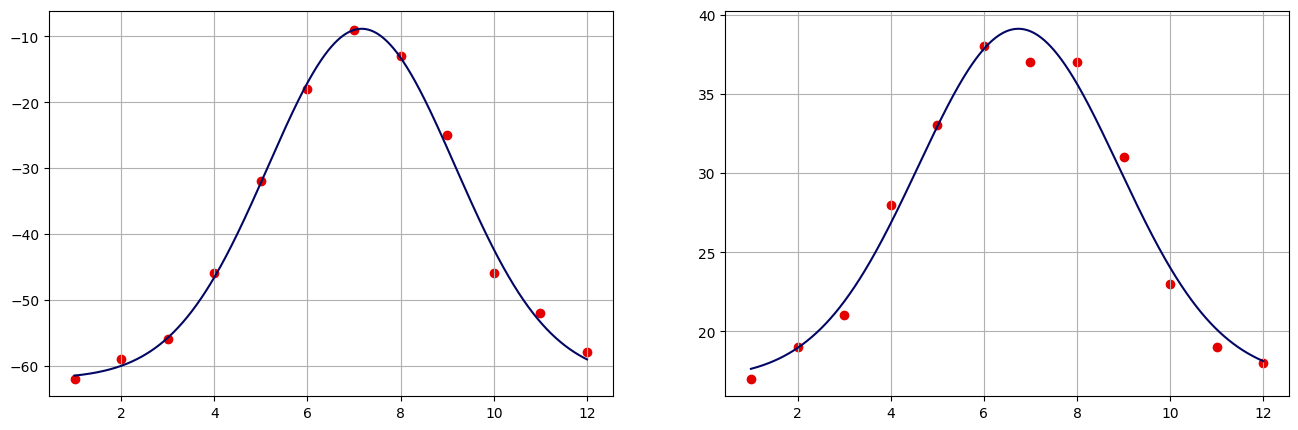

In [4]:
max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

x = range(1, 13)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

ax1.scatter(x, min, color='xkcd:red')
ax2.scatter(x, max, color='xkcd:red')

def gaussian(x, mean, sigma, amp):
    n = sp.stats.norm(loc= mean, scale = sigma)
    return n.pdf(x) * amp

par1, cov1 = sp.optimize.curve_fit(gaussian, x, min - min.min(), p0 = [7, 3, 60])
par2, cov2 = sp.optimize.curve_fit(gaussian, x, max - max.min(), p0 = [7, 3, 30])


a = np.linspace(1, 12, 1000)
ax1.plot(a, gaussian(a, *par1) + min.min(), color='xkcd:darkblue')
ax2.plot(a, gaussian(a, *par2) + max.min(), color='xkcd:darkblue')

ax1.grid()
ax2.grid()

print(par1[0], np.sqrt(cov1[0, 0]))
print(par2[0], np.sqrt(cov2[0,0]))

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


Method          | Steps | Result                    | Minimum
----------------------------------------------------------------------
Nelder-Mead     | 37    | [-1.70364695  0.79612274] | -0.21546379330327858
Powell          | 5     | [-0.08984202  0.7126564 ] | -1.0316284534898774
CG              | 10    | [-1.70360671  0.79608357] | -0.21546382438371858
BFGS            | 12    | [-1.70360672  0.79608355] | -0.21546382438371559
L-BFGS-B        | 12    | [-1.70360675  0.79608368] | -0.21546382438357659
TNC             | 10    | [-1.7035927   0.79608343] | -0.21546382250917928
SLSQP           | 10    | [-1.70357163  0.7960696 ] | -0.21546381093392641
COBYLA          | 28    | [ 0.0898171  -0.71266516] | -1.031628450224221


Text(0.5, 1.0, 'Different minimization methods')

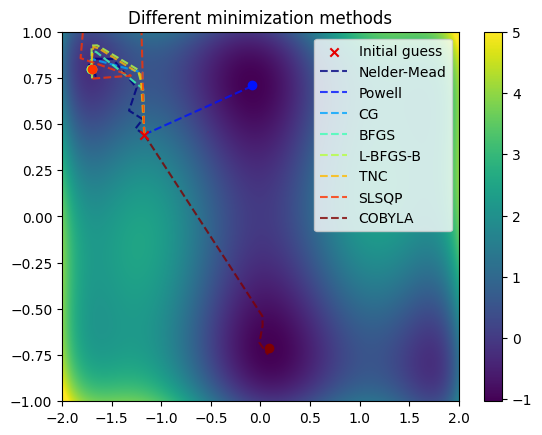

In [126]:
def f(x, y):
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2

x = np.linspace(-2, 2, 2000)
y = np.linspace(-1, 1, 2000)

xm, ym = np.meshgrid(x, y)

z = f(xm, ym)

my_extent = [x.min(), x.max(), y.min(), y.max()]
fig, ax = plt.subplots()
data = ax.imshow(z, extent = my_extent, origin = 'lower', aspect = 'auto', vmax = 5)
fig.colorbar(data, ax= ax)

methods = [
    'Nelder-Mead',  # Robust, derivative-free
    'Powell',       # Robust, derivative-free
    'CG',           # Uses numerical gradients
    'BFGS',         # Uses numerical gradients (Standard)
    'L-BFGS-B',     # Uses numerical gradients (Low memory)
    'TNC',          # Uses numerical gradients
    'SLSQP',        # Uses numerical gradients
    'COBYLA'        # Derivative-free (Constrained Optimization BY Linear Approximations)
]


guess = [np.random.uniform(-2, 2), np.random.uniform(-1, 1)]
#guess = [0, 0]

ax.scatter(guess[0], guess[1], marker='x', color = 'xkcd:red', label = 'Initial guess', zorder = 3)

cmap = plt.get_cmap('jet', len(methods))

print(f"{'Method':<15} | {'Steps':<5} | {'Result':<25} | {'Minimum'}")
print("-" * 70)

for i, method in enumerate(methods):
    path = [guess]

    def logger(xk):
        path.append(np.copy(xk))

    sol = sp.optimize.minimize(lambda w: f(w[0], w[1]), x0 = guess, method = method, callback=logger)
    color = cmap(i)
    path.append(sol.x)
    path = np.array(path)

    ax.plot(path[:, 0], path[:, 1], color = color, linestyle = '--', label = f'{method}', alpha = 0.8)
    ax.scatter(sol.x[0], sol.x[1], color = color, zorder = 3)

    print(f"{method:<15} | {len(path):<5} | {sol.x} | {f(sol.x[0], sol.x[1])}") 

ax.set_xbound(-2,2)
ax.set_ybound(-1, 1)
ax.legend(loc = 'best')
ax.set_title('Different minimization methods')




4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [283]:
import pandas as pd

data = pd.read_table('populations.txt')
data

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


0.09523809523809523 0.09523809523809523


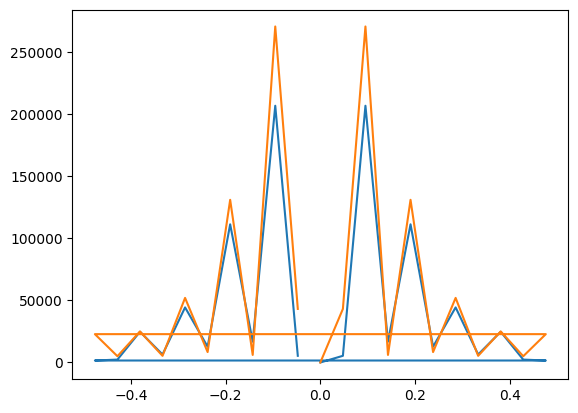

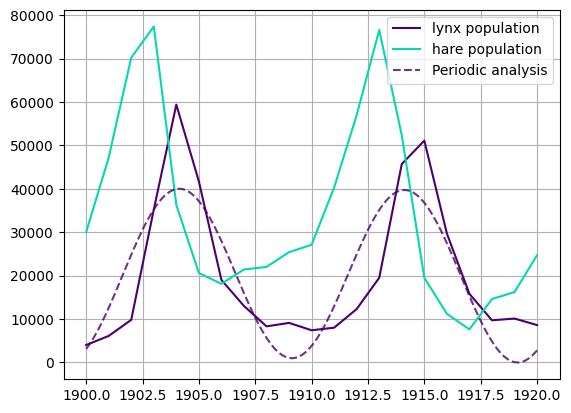

In [284]:
lynx_centered = data['lynx']-data['lynx'].mean()
hare_centered = data['hare']-data['hare'].mean()

time_step = (data['year'].max()-data['year'].min())/(len(data['year'])-1)

sig = sp.fft.fft(lynx_centered)
power = np.abs(sig)
freq = sp.fft.fftfreq(sig.size, d=time_step)

plt.plot(freq, power)
peak_freq_lynx = freq[power.argmax()]

sig2 = sp.fft.fft(hare_centered)
power2 = np.abs(sig2)
freq2 = sp.fft.fftfreq(sig2.size, d=time_step)

plt.plot(freq2, power2)
peak_freq_hare = freq[power2.argmax()]



print(peak_freq_lynx, peak_freq_hare)

high_power_spectrum = np.copy(sig)
high_power_spectrum[np.abs(freq) > peak_freq_lynx] = 0
filtered_sig = sp.fft.ifft(high_power_spectrum)

fig, ax = plt.subplots()
ax.plot(data['year'], data['lynx'], label = 'lynx population', color = 'xkcd:royal purple')
ax.plot(data['year'], data['hare'], label = 'hare population', color = 'xkcd:aquamarine')


# smoothing procedure (Zero-Padding) ...remember NMR?

upscale_factor = 20
N = sig.size * upscale_factor

half_N = sig.size //2 
yf = np.concatenate([high_power_spectrum[:half_N], np.zeros(N-sig.size), high_power_spectrum[half_N:]])
y_smooth = sp.fft.ifft(yf).real * upscale_factor
x = np.linspace(data['year'].min(), data['year'].max(), N)

ax.plot(x, y_smooth+data['lynx'].mean(), label = 'Periodic analysis', linestyle = '--', color = 'xkcd:royal purple', alpha = 0.8)



ax.legend(loc = 'best')
ax.grid()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

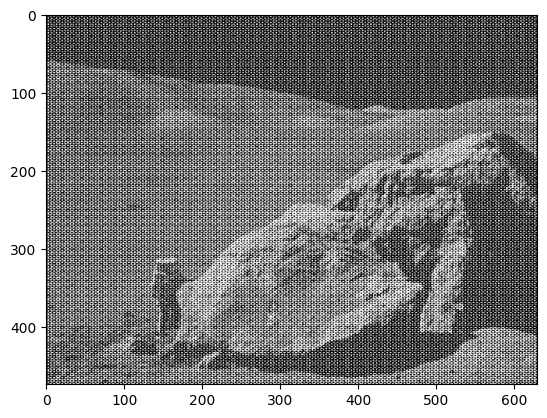

In [400]:
image = plt.imread('moonlanding.png')
plt.imshow(image, cmap = 'gray')


Text(0.5, 1.0, 'Combination')

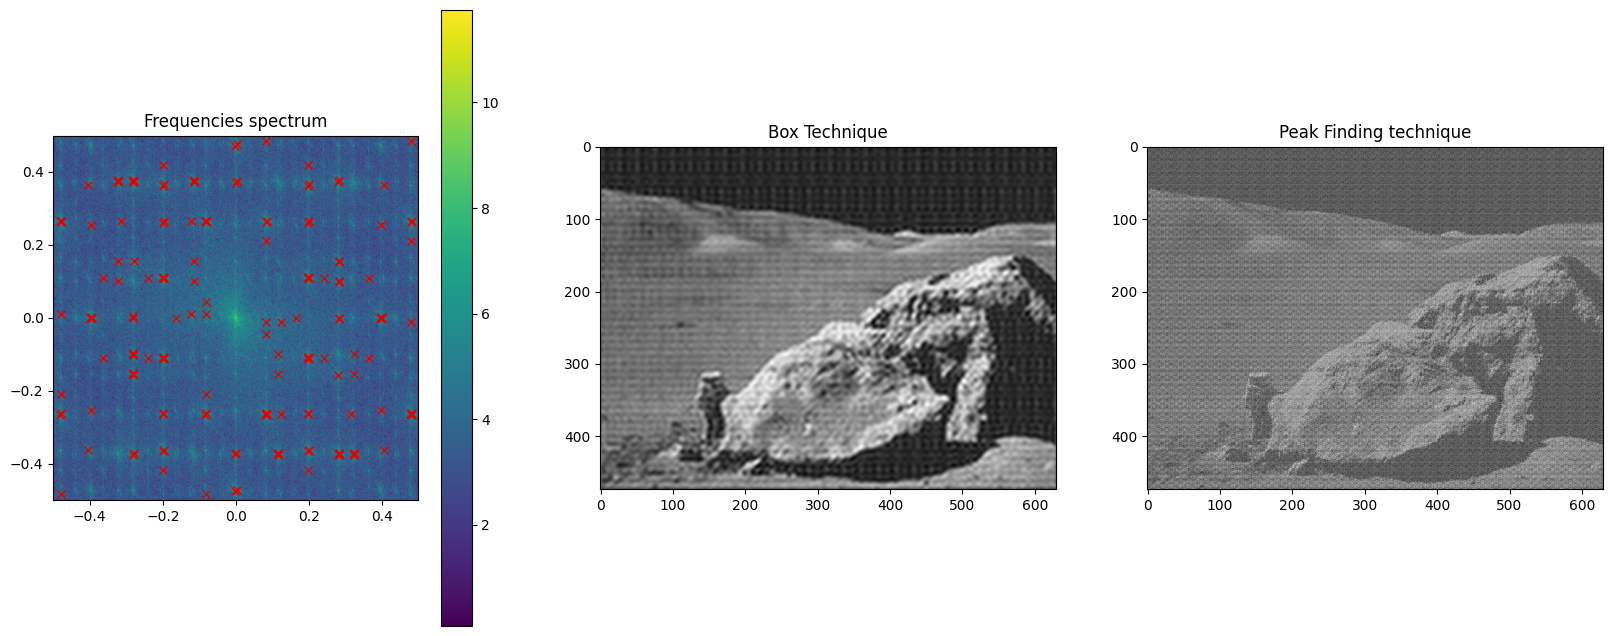

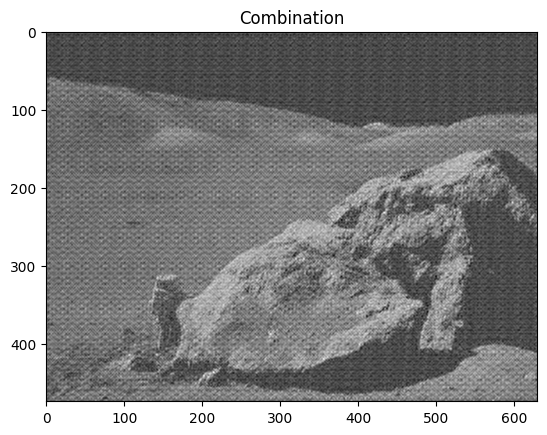

In [416]:
f = sp.fft.fft2(image)
rows, cols = image.shape

f_shifted = sp.fft.fftshift(f)      #shifting required to center the (0,0) spike at the center of the image ( maybe )
pow = np.log(1+np.abs(f_shifted))

freq_x = sp.fft.fftfreq(rows)
freq_y = sp.fft.fftfreq(cols)
freq_x_shifted = sp.fft.fftshift(freq_x)
freq_y_shifted = sp.fft.fftshift(freq_y)
my_extent = [freq_x_shifted.min(), freq_x_shifted.max(), freq_y_shifted.min(), freq_y_shifted.max()]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))
data = ax1.imshow(pow, extent=my_extent)
plt.colorbar(data, ax = ax1)


# BOX AROUND THE CENTER, EVERYTHING ELSE IS SET TO ZERO
p = 0.1

crow = rows // 2
ccol = cols // 2
k_rows = int(rows * p)
k_cols = int(cols * p)

filtered_freq = f_shifted.copy()
filtered_freq[:, :] = 0
filtered_freq[crow-k_rows : crow+k_rows, ccol-k_cols:ccol+k_cols] = f_shifted[crow-k_rows : crow+k_rows, ccol-k_cols:ccol+k_cols]
F = sp.fft.ifftshift(filtered_freq)
clean_image = sp.fft.ifft2(F).real

ax2.imshow(clean_image, cmap = 'gray')
ax2.set_title('Box Technique')

# ALTERNATIVE: FIND ALL THE PERIODIC SPIKES IGNORING THE CENTER
spectrum_search = f_shifted.copy()

y, x = np.ogrid[:rows, :cols]

radius = 40
center_mask = (x-ccol)**2 + (y-crow)**2 < radius**2

spectrum_search[center_mask] = 0

threshold = spectrum_search.mean() + 2* spectrum_search.std()
spike_indices = np.argwhere(spectrum_search > threshold)

pixel_rows = spike_indices[:, 0]
pixel_cols = spike_indices[:, 1]

sx = freq_x_shifted[pixel_rows]
sy = freq_y_shifted[pixel_cols]

ax1.plot(sy, sx, linestyle = '', marker = 'x', color = 'xkcd:red')
ax1.set_title('Frequencies spectrum')

s = f_shifted.copy()
window = 10
for r, c in spike_indices:
    s[r-window:r+window, c-window:c+window] = 0

t = sp.fft.ifftshift(s)
final_image = sp.fft.ifft2(t).real
ax3.imshow(final_image, cmap = 'gray')
ax3.set_title('Peak Finding technique')


#combination
spectrum_search = f_shifted.copy()

y, x = np.ogrid[:rows, :cols]

radius = 40
center_mask = (x-ccol)**2 + (y-crow)**2 < radius**2

spectrum_search[center_mask] = 0

threshold = spectrum_search.mean() + 1.5* spectrum_search.std()
spike_indices = np.argwhere(spectrum_search > threshold)

s = f_shifted.copy()
window = 10
for r, c in spike_indices:
    s[r-window:r+window, c-window:c+window] = 0

p = 0.3

crow = rows // 2
ccol = cols // 2
k_rows = int(rows * p)
k_cols = int(cols * p)

a = f_shifted.copy()
a[:, :] = 0
a[crow-k_rows : crow+k_rows, ccol-k_cols:ccol+k_cols] = s[crow-k_rows : crow+k_rows, ccol-k_cols:ccol+k_cols]

b = sp.fft.ifftshift(a)
c = sp.fft.ifft2(b).real

fig2, ax = plt.subplots()
ax.imshow(c, cmap = 'gray')
ax.set_title('Combination')


